# K-Nearest Neighbors

## Model training and evaluation process

### Import related modules and load the iris data set.

The data set has four features and three classifications. The total number of samples is 150.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

In [3]:
print(X,y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Draw a violin plot of each feature.

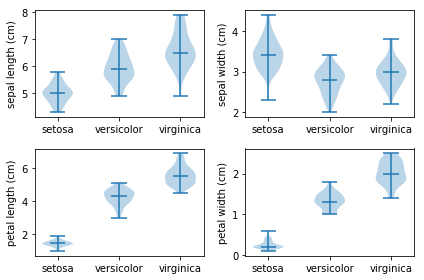

In [4]:
feature = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
name = ['setosa', 'versicolor', 'virginica']
for i in range(len(feature)):
    mm = X[:,i]
    a = []; b = []; c = []
    for j in range(len(mm)):
        if y[j] == 0:
            a.append(mm[j])
        elif y[j] == 1:
            b.append(mm[j])
        elif y[j] == 2:
            c.append(mm[j])
    d = np.vstack((a,b,c)).T
    plt.subplot(2, 2, i + 1)
    plt.violinplot(d,showmedians=True)
    plt.xticks([1,2,3],name)
    plt.ylabel(feature[i])
plt.tight_layout()
plt.show()

The above part is the distribution of each feature. The two pictures above show the length and width of the sepal, and the two pictures below show the length and width of the petals.It can be seen from the figure that the sepal length and width distribution of the three flowers are wide, and there are many overlapping types of different flower types, which is difficult to distinguish. For the length and width of the petals, the distribution of each flower is narrow, and there are fewer overlapping parts. It is easy to classify the three flowers.

###  Import machine learning modules from sklearn.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline, FeatureUnion

### Divide the training and test sets. Feature selection and dimensionality reduction.

First, the training set and the test set are divided according to a ratio of 4:1. Then the features were selected, and we used PCA dimensionality reduction and analysis of variance. We use FeatureUnion to connect the two transformer objects in parallel.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=10,stratify=y)

pca = PCA(n_components=2)
selection = SelectKBest(f_classif,k=2)
combined_features = FeatureUnion([("pca", pca), ("f_select", selection)])

### Cross validation with GridSearchCV

We use Pipeline to combine combined_features, standard, and knn. Standardization is mainly to make different features comparable. We then used GridSearchCV to perform a 10-fold cross-validation of the grid search hyperparameters. The main process is to change the hyperparameters, and then compare the scores of the 10-fold cross-validation to finally select the best parameters.

In [7]:
pipe = Pipeline([("features", combined_features),("standard",StandardScaler()),("knn", KNeighborsClassifier())])

params = {'features__pca__n_components': [1, 2, 3],
          'features__f_select__k':[1, 2],
          'knn__n_neighbors': [1, 3, 5],
          'knn__p': [1, 2]}

clf = GridSearchCV(pipe,param_grid=params,cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('f_select', SelectKBest(k=2, score_func=<function f_classif at 0x0000023202102C80>))],
       transfo...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'features__pca__n_components': [1, 2, 3], 'features__f_select__k': [1, 2], 'knn__n_neighbors': [1, 3, 5], 'knn__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### Print out the training results.

This process is based on the cross-validated score and its standard deviation during training.As can be seen from the results, 1) When the number of features selected by PCA and analysis of variance is small, the cross-validation score is low and the variance is large. At this time, the model performance is unstable. 2) When the number of features is small, with the increase of n_neighbors in knn, the score increases significantly. 3) When the number of features is small, using Manhattan_distance and euclidean_distance, there is almost no difference in cross-validation score between the two. When the number of features is large, the difference becomes obvious.

In [8]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print("best CV_score: %0.3f   best parameter: %r" % (clf.best_score_, clf.best_params_))

0.908 (+/-0.174) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 1, 'knn__p': 1}
0.908 (+/-0.174) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 1, 'knn__p': 2}
0.933 (+/-0.163) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 3, 'knn__p': 1}
0.933 (+/-0.163) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 3, 'knn__p': 2}
0.942 (+/-0.167) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 5, 'knn__p': 1}
0.942 (+/-0.167) for {'features__f_select__k': 1, 'features__pca__n_components': 1, 'knn__n_neighbors': 5, 'knn__p': 2}
0.933 (+/-0.125) for {'features__f_select__k': 1, 'features__pca__n_components': 2, 'knn__n_neighbors': 1, 'knn__p': 1}
0.933 (+/-0.125) for {'features__f_select__k': 1, 'features__pca__n_components': 2, 'knn__n_neighbors': 1, 'knn__p': 2}
0.950 (+/-0.082) for {'features__f_selec

### Evaluate the model with the test set.

In classification problems, the accuracy of the test set can be used to evaluate the model. The accuracy of the model on the test set is 100%.

In [9]:
score = clf.score(X_test,y_test)

print("test score:",score)

test score: 1.0


### Print out the precision and recall of the training and test sets.

In classification problems, precision and recall can also be used to evaluate the model. 1) If the model has a high precision value and a low recall value for a certain category, it means that the model is too conservative for predicting such problems. 2) If the values of precision and recall are high, we can use f1-score to comprehensively evaluate.
From the results of the training set, the precision and recall values for the first flower are both 1, indicating that the prediction accuracy is 100%. The recall value of the second flower and the precision value of the third flower are lower than 1, which may be that the model incorrectly predicted a few second flowers as the third flower.

In [10]:
from sklearn.metrics import classification_report

y_train_predict = clf.best_estimator_.predict(X_train)
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      0.97      0.99        40
           2       0.98      1.00      0.99        40

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Since the accuracy on the test set is 100%, the values of precision and recall are also 1.

In [11]:
y_predict = clf.best_estimator_.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Draw the ROC curve.

The full name of ROC is Receiver Operating Characteristic Curve.The ROC curve is a line connecting a series of (FPR, TPR) value points under threshold.The closer the ROC curve is to the upper left corner, the better the performance of the model. Since the accuracy is 100% on the test set, the curve is almost close to the coordinate axis.

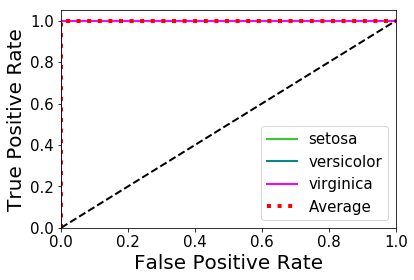

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle
yy = label_binarize(y, classes=[0,1,2])
y_test_2 = label_binarize(y_test, classes=[0,1,2])
n_classes = yy.shape[1]
labels = ['setosa', 'versicolor', 'virginica']

classifier = OneVsRestClassifier(clf.best_estimator_)

if hasattr(classifier, "decision_function"):
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)
else:
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
colors = cycle(["limegreen","darkcyan","magenta"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='{0}'
            ''.format(labels[i]))
plt.plot(fpr["micro"], tpr["micro"],
        label='Average',
        color='red', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)

plt.legend(loc="lower right",prop = {'size':15})

plt.show()

## Understanding of the KNN model.

This part is an understanding of the KNN model. The traditional KNN model is divided into the following 5 parts(function):
1) init: The main control parameters are passed in. There are two parameters: k (the number of nearest neighbors), and dist_fn (for the definition of distance, generally Euclidean distance)
2) encliden_dist: This function defines the Euclidean distance (the straight line distance between two points).
3) find_nearest: This function is used to calculate the distance between the prediction point and the training sample when making predictions.
4) fit: This function is used for model training. Since the KNN model is lazy, the training process becomes a process of saving the training set.
5) predict: This function is used to predict unknown data points. It first calculates the distance between the predicted points and the points in the training set, then sorts them, and finally selects the points with the most class as the category of the predicted points.

In [13]:
import numpy as np

class KNNClassifier(object):
    def __init__(self, k, dist_fn=None):
        self.k = k
        if dist_fn is None:
            self.dist_fn = self._euclidean_dist
    
    def _euclidean_dist(self, a, b):
        dist = 0.
        for ele_i, ele_j in zip(a, b):
            dist += ((ele_i - ele_j)**2)
        dist = dist**0.5
        return dist
        
    def _find_nearest(self, x):
        dist_idx_pairs = []
        for j in range(self.dataset_.shape[0]):
            d = self.dist_fn(x, self.dataset_[j])
            dist_idx_pairs.append((d, j))
            
        sorted_dist_idx_pairs = sorted(dist_idx_pairs)

        return sorted_dist_idx_pairs
    
    def fit(self, X, y):
        self.dataset_ = X.copy()
        self.labels_ = y.copy()
        self.possible_labels_ = np.unique(y)

    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            k_nearest = self._find_nearest(X[i])[:self.k]
            indices = [entry[1] for entry in k_nearest]
            k_labels = self.labels_[indices]
            counts = np.bincount(k_labels,
                                 minlength=self.possible_labels_.shape[0])
            pred_label = np.argmax(counts)
            predictions[i] = pred_label
        return predictions

## Improvements to the KNN model.

### KNN model based on SVM feature weighting.

This part is my improvement on the KNN model. When KNN calculates the distance, it treats each feature uniformly. However, when the number of features is large, sometimes it is necessary to weight the unimportant features, so I mainly weight the features of the KNN when calculating the distance.The main process is as follows: First, the training set is trained with SVM to obtain the importance of features. Then customize the distance function and add the weight calculated by the SVM to the distance function. Finally, the defined function is put into the metric in the KNN model.
This improved KNN algorithm, which I used to classify high-entropy alloys, has significantly improved the accuracy of the test set.

In [14]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

SVM = SVC(C=31, kernel='linear',gamma='auto').fit(X_train,y_train)
calculate_weight = (SVM.coef_[0])**2 + (SVM.coef_[1])**2 + (SVM.coef_[2])**2
def my_metric(x,y):
    dis = 0
    for num_feature in range(len(x)):
        dis += ((x[num_feature] - y[num_feature])**2)*(calculate_weight[num_feature])
    dis = dis**(0.5)
    return dis
KNN = KNeighborsClassifier(n_neighbors=3,algorithm='auto',metric=my_metric)
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function my_metric at 0x0000023202A8A598>,
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')